In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
# We will analyse the renamed "dmlz_assay" csv file in this notebook
DH_ROOT = '../data/ptfi_2/dh_and_bm_data/drillholes/'

assay = pd.read_csv(DH_ROOT + 'assay.csv')
bf = pd.read_csv(DH_ROOT + 'bulk_factor.csv')
bulk = pd.read_csv(DH_ROOT + 'bulk.csv')
collar = pd.read_csv(DH_ROOT + 'collar.csv')
survey = pd.read_csv(DH_ROOT + 'survey.csv')

# Assay

---

We can see a full dataset for assay.csv. However, we might not be able to use all the data, so we have to do some preliminary data cleaning first.

---


(0.0, 5.0)

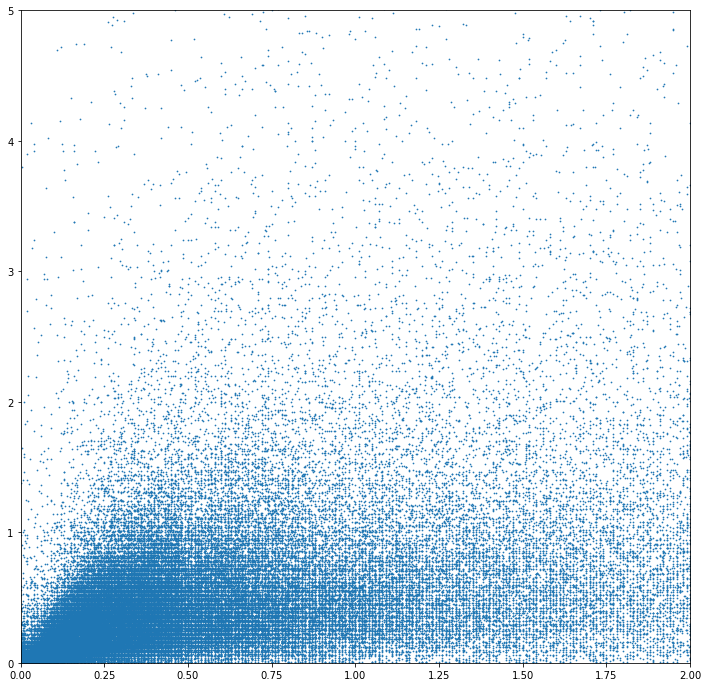

In [5]:
x, y = assay.CU, assay.AU

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)

ax.scatter(x, y, s=0.5)
ax.set_xlim(0, 2)
ax.set_ylim(0, 5)

In [6]:
assay.count()

HOLEID    132209
FROM      132209
TO        132209
INTLEN    132209
SAMPID    132209
CU        132209
AU        132209
AG        132209
dtype: int64

In [7]:
assay.describe()

,FROM,TO,INTLEN,CU,AU,AG
count,132209.000000,132209.000000,132209.000000,132209.000000,132209.000000,132209.000000
mean,202.491631,204.932582,2.440951,0.954202,0.505828,3.910086
std,195.537457,195.938056,0.875741,1.553903,2.209206,7.815807
min,0.000000,0.450000,0.050000,-9.000000,-9.000000,-9.000000
25%,48.000000,50.000000,1.500000,0.170000,0.110000,0.800000
50%,132.000000,135.000000,3.000000,0.398100,0.330000,2.000000
75%,314.700000,317.600000,3.000000,1.050000,0.700000,4.800000
max,1297.500000,1300.000000,60.250000,56.910000,141.000000,419.000000


---

We can see a few questionable values: such as the negative grades for some entries

---

In [8]:
float_cols = list(assay.select_dtypes(include=['float64']).columns)
float_cols
assay[assay[float_cols] < 0.0].describe()

,FROM,TO,INTLEN,CU,AU,AG
count,0.0,0.0,0.0,9.0,2824.0,5221.0
mean,NaN,NaN,NaN,-9.0,-9.0,-9.0
std,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,-9.0,-9.0,-9.0
25%,NaN,NaN,NaN,-9.0,-9.0,-9.0
50%,NaN,NaN,NaN,-9.0,-9.0,-9.0
75%,NaN,NaN,NaN,-9.0,-9.0,-9.0
max,NaN,NaN,NaN,-9.0,-9.0,-9.0


---

There are 9 negative entries for copper, 2824 for gold, and 5221 for silver. All these have the value -9.0, and may just represent no data. These will have to be removed as they are not the data that we want.

---

In [9]:
assay[assay[float_cols] < 0.0].describe() 

,FROM,TO,INTLEN,CU,AU,AG
count,0.0,0.0,0.0,9.0,2824.0,5221.0
mean,NaN,NaN,NaN,-9.0,-9.0,-9.0
std,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,-9.0,-9.0,-9.0
25%,NaN,NaN,NaN,-9.0,-9.0,-9.0
50%,NaN,NaN,NaN,-9.0,-9.0,-9.0
75%,NaN,NaN,NaN,-9.0,-9.0,-9.0
max,NaN,NaN,NaN,-9.0,-9.0,-9.0


In [10]:
neg_cu_idx = assay.index[assay['CU'] < 0.0].to_list()
assay.iloc[neg_cu_idx]

,HOLEID,FROM,TO,INTLEN,SAMPID,CU,AU,AG
1253,M12-12,156.0,159.00,3.00,M12-12_0156_0159,-9.0,0.16,1.6
58779,M7-15,81.0,84.90,3.90,M7-15_0081_0084,-9.0,0.88,1.0
78480,M6-5,219.0,222.00,3.00,M6-5_0219_0222,-9.0,0.11,1.0
82622,M7-6,261.0,262.20,1.20,M7-6_0261_0262,-9.0,0.04,1.0
82623,M7-6,262.2,265.25,3.05,M7-6_0262_0265,-9.0,0.25,1.0
87279,M6-9,288.0,290.00,2.00,M6-9_0288_0290,-9.0,0.57,1.0
120431,M8-11,24.0,27.00,3.00,M8-11_0024_0027,-9.0,0.67,1.0
122315,M12-6B,147.0,150.00,3.00,M12-6B_0147_0150,-9.0,0.27,4.1
122542,M8-12,297.0,300.00,3.00,M8-12_0297_0300,-9.0,0.03,1.0


---

Here is an example of what these entries with negative values look like.

---

In [11]:
# unique values for each dimension

columns = list(assay.columns)
for col in columns:
    print(f"{col}: {len(assay[col].unique())}")
    
# percentage of valid entries with a unique value

print()
for col in columns:
    a = 100 * len(assay[col].unique()) / assay.count()[col]
    print(f"{col}: {a:.2f}%")

HOLEID: 1360
FROM: 9314
TO: 9379
INTLEN: 163
SAMPID: 132209
CU: 13365
AU: 2108
AG: 777

HOLEID: 1.03%
FROM: 7.04%
TO: 7.09%
INTLEN: 0.12%
SAMPID: 100.00%
CU: 10.11%
AU: 1.59%
AG: 0.59%


array([[<AxesSubplot:title={'center':'FROM'}>,
        <AxesSubplot:title={'center':'TO'}>],
       [<AxesSubplot:title={'center':'INTLEN'}>,
        <AxesSubplot:title={'center':'CU'}>],
       [<AxesSubplot:title={'center':'AU'}>,
        <AxesSubplot:title={'center':'AG'}>]], dtype=object)

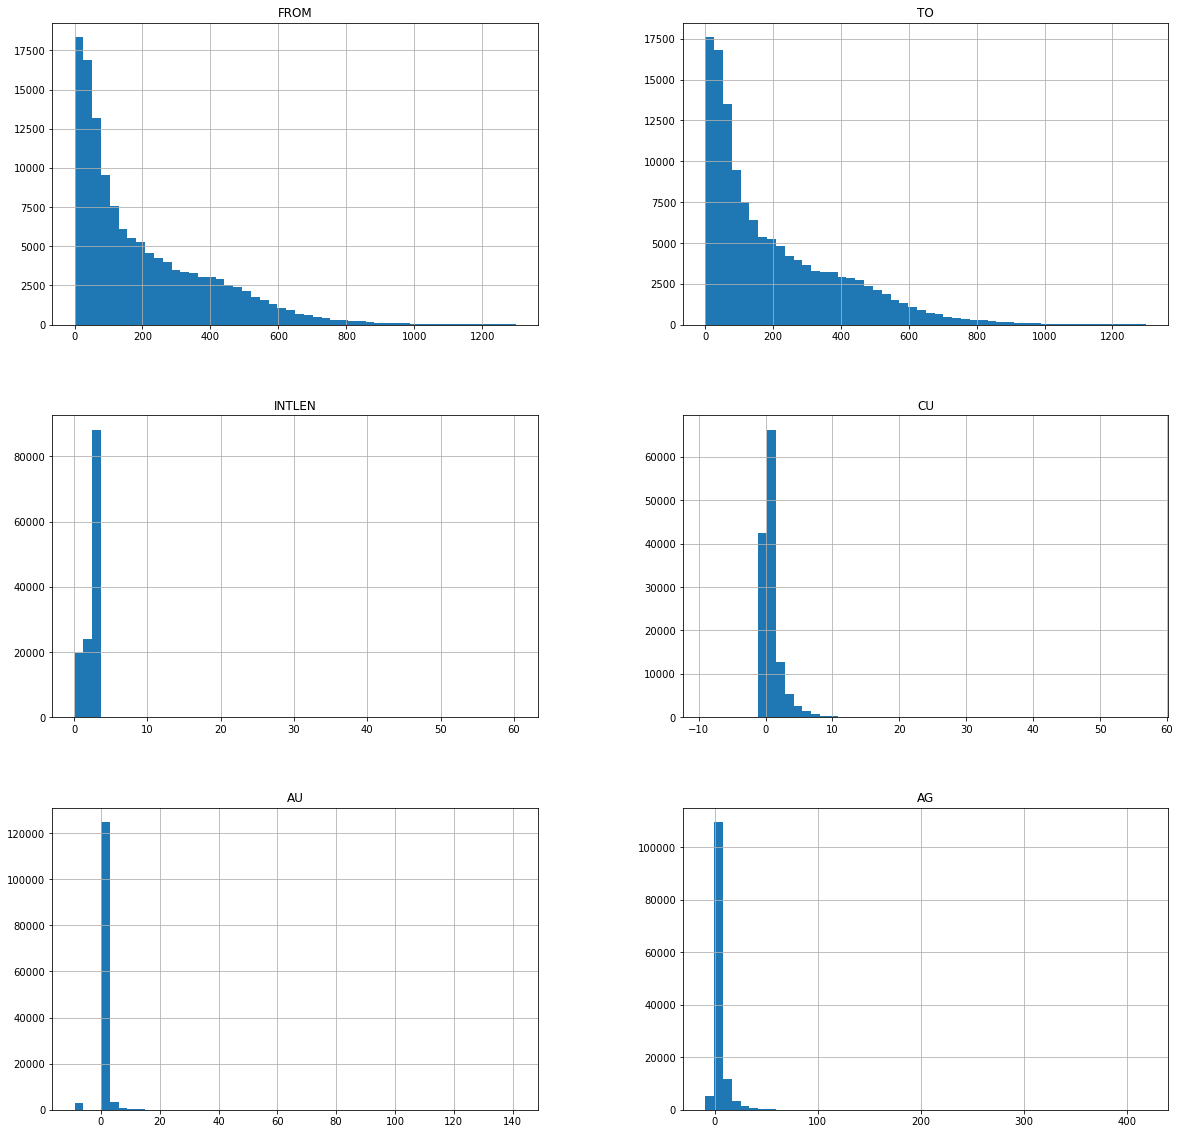

In [12]:
assay.hist(
    bins=50, 
    figsize=(20, 20)
)

# Bulk Factor
A full dataset with the exception of 'BITSIZ', missing a hundred or so values. These values are missing in 3 spots, and seem to be consecutive. Not sure why they are missing.

In [13]:
bf.columns

Index(['HOLEID', 'FROM', 'TO', 'INTLEN', 'BITSIZ', 'RECOV', 'BULK_F'], dtype='object')

In [14]:
indices = list(bf.loc[pd.isna(bf['BITSIZ']), :].index)

prev = None
for i in indices:
    if prev == None:
        prev = i
        print(f'- i: {i}')
    else:
        delta = i - prev
        prev = i
        print(f'{delta} i:{i}')

- i: 5018
1 i:5019
1 i:5020
1 i:5021
1 i:5022
1 i:5023
1 i:5024
1 i:5025
1 i:5026
1 i:5027
81707 i:86734
1 i:86735
1 i:86736
1 i:86737
1 i:86738
1 i:86739
1 i:86740
1 i:86741
1 i:86742
1 i:86743
1 i:86744
1 i:86745
1 i:86746
1 i:86747
1 i:86748
1 i:86749
1 i:86750
1 i:86751
1 i:86752
1 i:86753
1 i:86754
1 i:86755
1 i:86756
1 i:86757
1 i:86758
1 i:86759
1 i:86760
1 i:86761
1 i:86762
1 i:86763
1 i:86764
1 i:86765
1 i:86766
1 i:86767
1 i:86768
1 i:86769
1 i:86770
1 i:86771
1 i:86772
1 i:86773
1 i:86774
1 i:86775
1 i:86776
1 i:86777
1 i:86778
1 i:86779
1 i:86780
1 i:86781
1 i:86782
1 i:86783
1 i:86784
1 i:86785
1 i:86786
1 i:86787
1 i:86788
1 i:86789
1 i:86790
1 i:86791
1 i:86792
1 i:86793
1 i:86794
1 i:86795
1 i:86796
1 i:86797
1 i:86798
1 i:86799
1 i:86800
1 i:86801
1 i:86802
1 i:86803
1 i:86804
1 i:86805
1 i:86806
1 i:86807
1 i:86808
1 i:86809
1 i:86810
1 i:86811
1 i:86812
1 i:86813
1 i:86814
1 i:86815
1 i:86816
1 i:86817
1 i:86818
50006 i:136824
1 i:136825
1 i:136826
1 i:136827
1 i:136

In [15]:
bf.describe()

,FROM,TO,INTLEN,RECOV,BULK_F
count,193353.000000,193353.000000,193353.000000,193353.000000,193353.000000
mean,223.678692,226.253728,2.575036,95.414416,0.920977
std,182.739707,182.792555,0.775834,14.304971,0.743751
min,0.000000,0.020000,0.020000,0.000000,-9.000000
25%,73.000000,75.100000,2.000000,100.000000,0.980000
50%,182.600000,185.400000,3.000000,100.000000,0.990000
75%,338.400000,341.000000,3.000000,100.000000,0.990000
max,1298.400000,1300.000000,58.450000,183.330000,0.999000


---

Also, some values are very questionable, such as the extremely long `INTLEN` values, and some don't seem to make any sense, such as the negative `BULK_F` values (of which there are 1079 instances of). All of these values are `-9.0`.

---

In [16]:
bf[bf['BULK_F'] < 0].describe()

,FROM,TO,INTLEN,RECOV,BULK_F
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.0
mean,316.171511,318.699268,2.527757,85.910519,-9.0
std,202.592175,202.837081,0.783554,20.202731,0.0
min,0.000000,0.200000,0.200000,0.000000,-9.0
25%,132.625000,135.550000,2.000000,81.275000,-9.0
50%,309.600000,312.650000,3.000000,95.000000,-9.0
75%,485.520000,488.620000,3.050000,98.670000,-9.0
max,1045.500000,1048.000000,4.150000,108.000000,-9.0


The `-9.0` values might stand in for bad/corrupted data, similar to how it shows in the assay dataset.

In [17]:
bf[bf['RECOV'] > 100].describe()

,FROM,TO,INTLEN,RECOV,BULK_F
count,594.00000,594.000000,594.000000,594.000000,594.000000
mean,196.32899,198.444630,2.115640,110.488771,0.820210
std,164.01639,163.977921,0.901816,10.235425,1.219363
min,0.00000,1.300000,0.250000,100.330000,-9.000000
25%,66.53750,69.362500,1.400000,103.330000,0.953250
50%,162.50000,164.500000,2.100000,107.140000,0.985500
75%,266.65000,269.200000,3.000000,113.490000,0.990000
max,1045.50000,1048.000000,7.500000,183.330000,0.999000


---

Additionally, there are some `RECOV`––presumably recovery––values that are above 100, which is in %, may not make sense. 

---

array([[<AxesSubplot:title={'center':'FROM'}>,
        <AxesSubplot:title={'center':'TO'}>],
       [<AxesSubplot:title={'center':'INTLEN'}>,
        <AxesSubplot:title={'center':'RECOV'}>],
       [<AxesSubplot:title={'center':'BULK_F'}>, <AxesSubplot:>]],
      dtype=object)

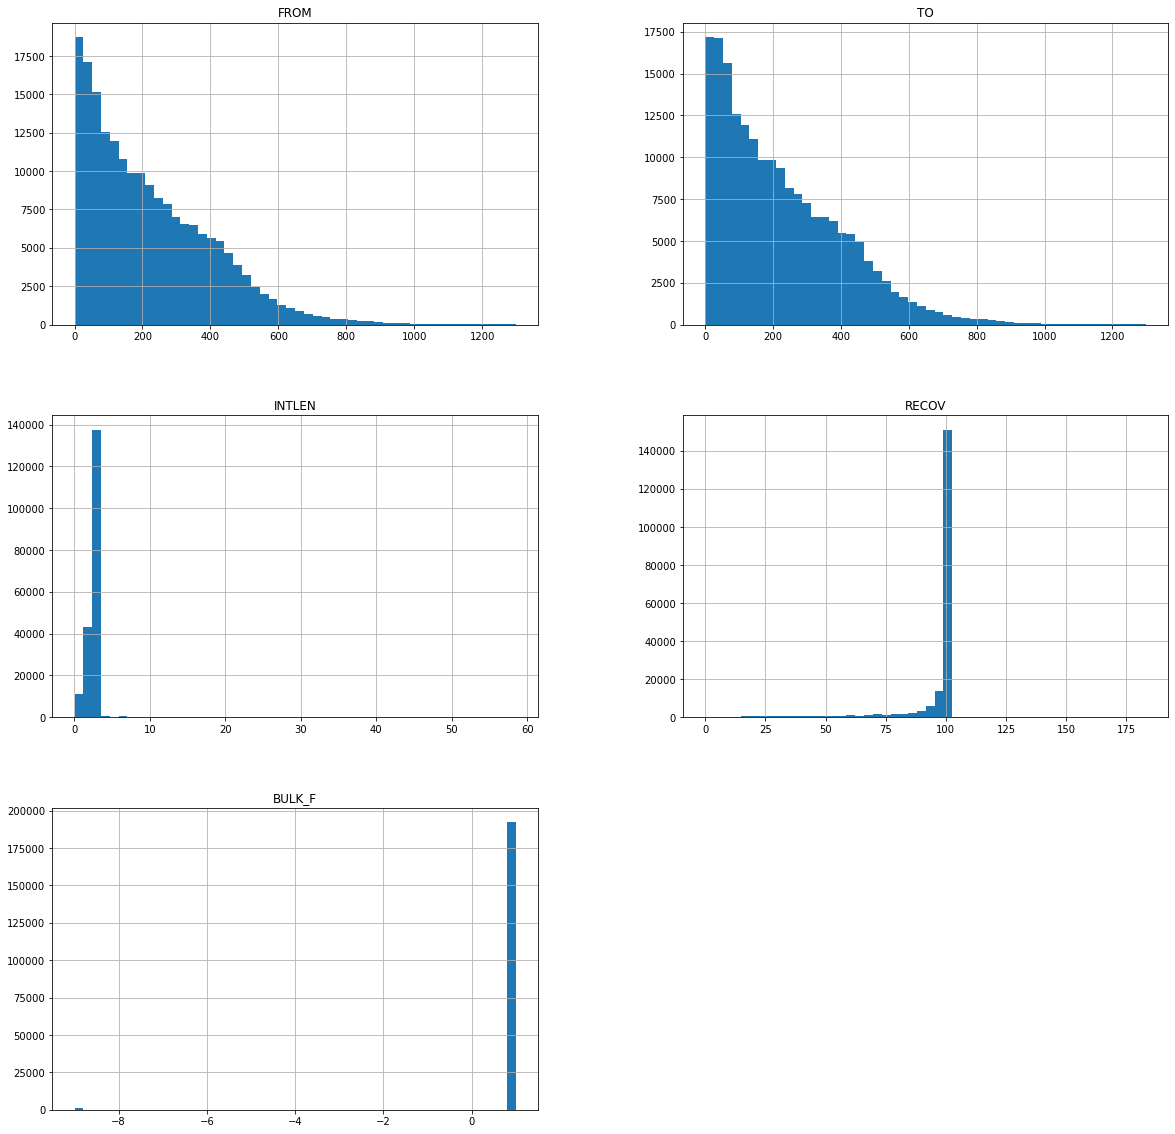

In [18]:
bf.hist(
    bins=50, 
    figsize=(20, 20)
)

# Bulk
A full dataset for bulk.csv

In [19]:
bulk.count()

HOLEID    155553
FROM      155553
TO        155553
INTLEN    155553
DENSTY    155553
dtype: int64

In [20]:
bulk.describe()

,FROM,TO,INTLEN,DENSTY
count,155553.000000,155553.000000,155553.000000,155553.000000
mean,228.664248,231.764124,3.099876,2.881490
std,183.654903,183.581327,1.643192,0.362573
min,0.000000,0.050000,0.050000,1.068100
25%,77.500000,80.600000,3.000000,2.695500
50%,188.900000,192.000000,3.000000,2.750400
75%,344.700000,347.700000,3.000000,2.994600
max,1297.500000,1300.000000,267.000000,6.647700


In [21]:
bulk[bulk['DENSTY'] >= 5].describe()

,FROM,TO,INTLEN,DENSTY
count,43.000000,43.000000,43.000000,43.000000
mean,153.489535,155.809302,2.319767,5.164326
std,151.005545,151.540490,1.407976,0.316237
min,24.000000,27.000000,1.500000,5.000000
25%,71.750000,73.250000,1.500000,5.010000
50%,87.500000,89.000000,1.500000,5.010000
75%,179.725000,182.700000,3.000000,5.190000
max,766.500000,769.500000,9.650000,6.647700


array([[<AxesSubplot:title={'center':'FROM'}>,
        <AxesSubplot:title={'center':'TO'}>],
       [<AxesSubplot:title={'center':'INTLEN'}>,
        <AxesSubplot:title={'center':'DENSTY'}>]], dtype=object)

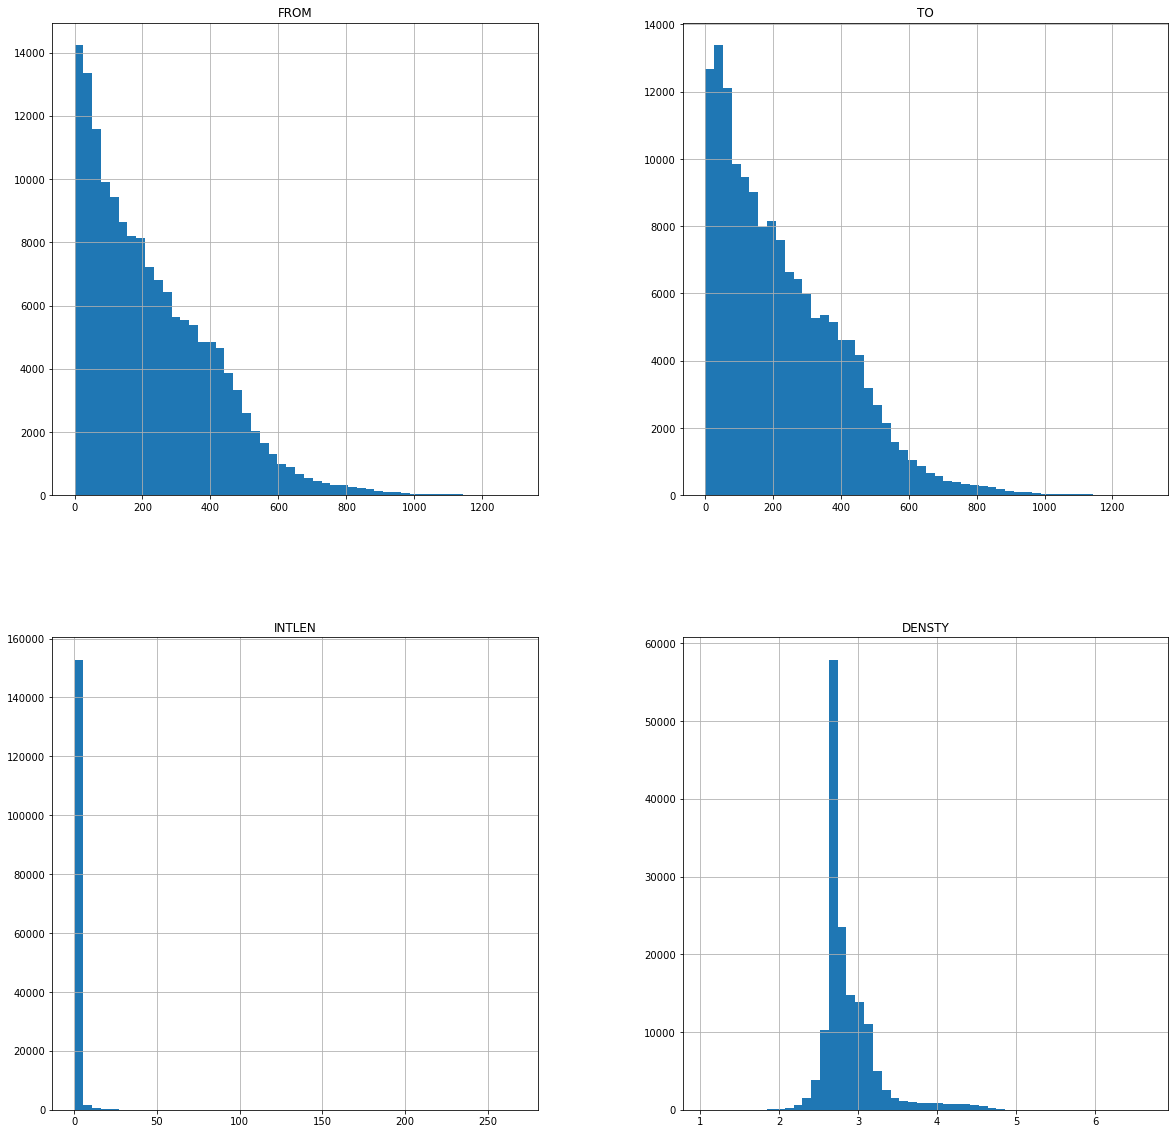

In [22]:
bulk.hist(
    bins=50, 
    figsize=(20, 20)
)

# Collar
Almost a full dataset for collar, missing a few values in 'ENDATE' and 'CORING'

In [23]:
collar.count()

HOLEID    1787
EAST      1787
NORTH     1787
ELEV      1787
TD        1787
AZI       1787
INCLIN    1787
ENDATE    1741
COMPST    1787
PROJ      1787
CLIENT    1787
CORING    1752
dtype: int64

In [24]:
len(collar.HOLEID.unique())

1787

In [25]:
collar.head()

,HOLEID,EAST,NORTH,ELEV,TD,AZI,INCLIN,ENDATE,COMPST,PROJ,CLIENT,CORING
0,DZ30-01GT-90,737277.996,9548950.851,3004.678,438.6,40.210,-48.439,12-Sep-2017,C,EESS,COWA,DD
1,DZ30-01SM-04,737664.303,9548767.564,3080.914,250.0,340.000,-44.920,22-Jan-2022,CG,EESS,COWA,DD
2,DZ30-03SM-02,736821.780,9549151.749,3092.879,550.0,354.712,-24.930,5-Aug-2022,CG,EESS,COWA,DD
3,DZ30-N0F-01,737494.450,9549029.078,3076.972,490.0,346.610,-64.217,18-Apr-2019,C,EESS,COWA,DD
4,DZ31-EJ4-917,737225.946,9549221.306,3104.496,397.2,103.520,-63.089,19-Sep-2020,C,EESS,COWA,DD


In [26]:
indices = list(collar.loc[pd.isna(collar['ENDATE']), :].index)

prev = None
for i in indices:
    if prev == None:
        prev = i
        print(f'- i: {i}')
    else:
        delta = i - prev
        prev = i
        print(f'{delta} i:{i}')

- i: 84
44 i:128
22 i:150
44 i:194
49 i:243
46 i:289
38 i:327
81 i:408
58 i:466
70 i:536
26 i:562
12 i:574
30 i:604
36 i:640
32 i:672
24 i:696
4 i:700
20 i:720
19 i:739
18 i:757
142 i:899
20 i:919
23 i:942
1 i:943
22 i:965
1 i:966
31 i:997
35 i:1032
417 i:1449
1 i:1450
1 i:1451
39 i:1490
1 i:1491
1 i:1492
36 i:1528
33 i:1561
1 i:1562
34 i:1596
42 i:1638
25 i:1663
13 i:1676
10 i:1686
13 i:1699
1 i:1700
13 i:1713
53 i:1766


In [27]:
indices = list(collar.loc[pd.isna(collar['CORING']), :].index)

prev = None
for i in indices:
    if prev == None:
        prev = i
        print(f'- i: {i}')
    else:
        delta = i - prev
        prev = i
        print(f'{delta} i:{i}')

- i: 84
44 i:128
22 i:150
44 i:194
49 i:243
3 i:246
43 i:289
38 i:327
139 i:466
70 i:536
38 i:574
325 i:899
20 i:919
23 i:942
1 i:943
23 i:966
31 i:997
35 i:1032
417 i:1449
1 i:1450
1 i:1451
39 i:1490
1 i:1491
1 i:1492
36 i:1528
33 i:1561
1 i:1562
34 i:1596
67 i:1663
13 i:1676
10 i:1686
13 i:1699
1 i:1700
13 i:1713
53 i:1766


In [28]:
collar.describe()

,EAST,NORTH,ELEV,TD,AZI,INCLIN
count,1787.000000,1.787000e+03,1787.000000,1787.000000,1787.000000,1787.000000
mean,737292.241866,9.549019e+06,3015.030748,281.982098,108.963092,-12.408657
std,224.563692,1.765833e+02,166.953684,221.810191,109.819662,47.711251
min,736628.811000,9.548613e+06,2532.340000,4.500000,0.000000,-90.000000
25%,737117.285000,9.548901e+06,3006.721000,83.000000,33.125000,-54.513000
50%,737298.170000,9.548992e+06,3055.090000,225.000000,44.554000,-16.950000
75%,737483.218500,9.549131e+06,3078.941000,467.700000,196.610000,26.000000
max,737863.690000,9.549583e+06,4011.610000,1300.000000,359.915000,90.000000


array([[<AxesSubplot:title={'center':'EAST'}>,
        <AxesSubplot:title={'center':'NORTH'}>],
       [<AxesSubplot:title={'center':'ELEV'}>,
        <AxesSubplot:title={'center':'TD'}>],
       [<AxesSubplot:title={'center':'AZI'}>,
        <AxesSubplot:title={'center':'INCLIN'}>]], dtype=object)

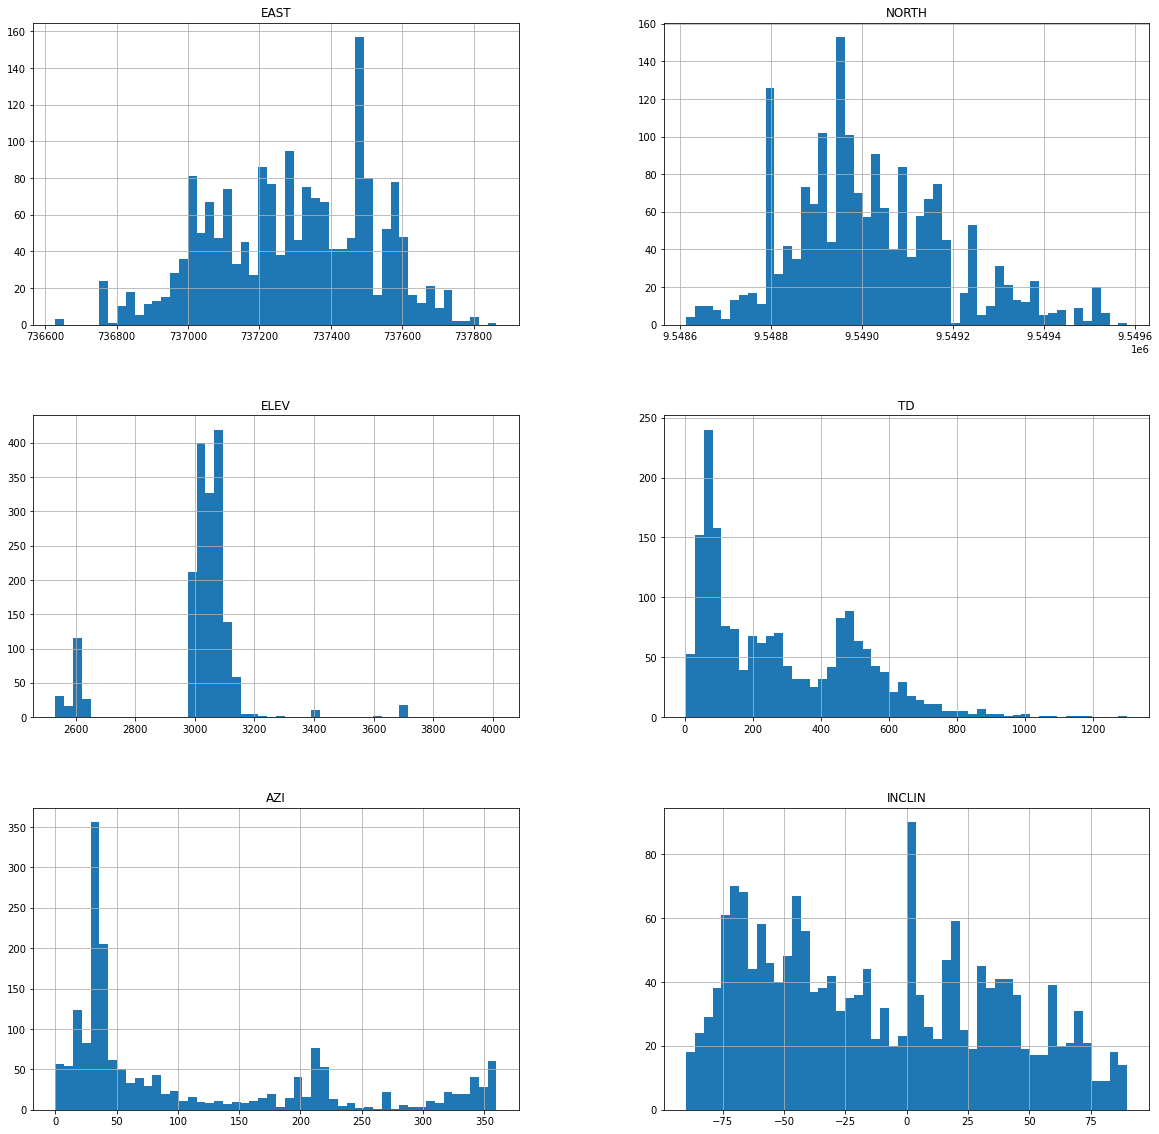

In [29]:
collar.hist(
    bins=50, 
    figsize=(20, 20)
)

# Survey
A full dataset for survey

In [30]:
survey.count()

HOLEID    121038
DEPTH     121038
AZIM      121038
DIP       121038
METD      121038
dtype: int64

In [31]:
survey.head()

,HOLEID,DEPTH,AZIM,DIP,METD
0,DZ30-01GT-90,0.0,40.21,-48.44,GYROREFLEX
1,DZ30-01GT-90,6.0,40.56,-48.16,GYROREFLEX
2,DZ30-01GT-90,12.0,40.63,-48.23,GYROREFLEX
3,DZ30-01GT-90,18.0,40.66,-48.25,GYROREFLEX
4,DZ30-01GT-90,24.0,40.77,-48.30,GYROREFLEX


In [32]:
survey.describe()

,DEPTH,AZIM,DIP
count,121038.000000,121038.000000,121038.000000
mean,259.778756,108.114146,-29.653340
std,185.842061,108.786498,41.550937
min,0.000000,0.000000,-90.000000
25%,111.000000,36.680000,-62.710000
50%,231.000000,53.290000,-43.550000
75%,381.000000,146.655000,7.880000
max,1300.000000,360.000000,90.000000


array([[<AxesSubplot:title={'center':'DEPTH'}>,
        <AxesSubplot:title={'center':'AZIM'}>],
       [<AxesSubplot:title={'center':'DIP'}>, <AxesSubplot:>]],
      dtype=object)

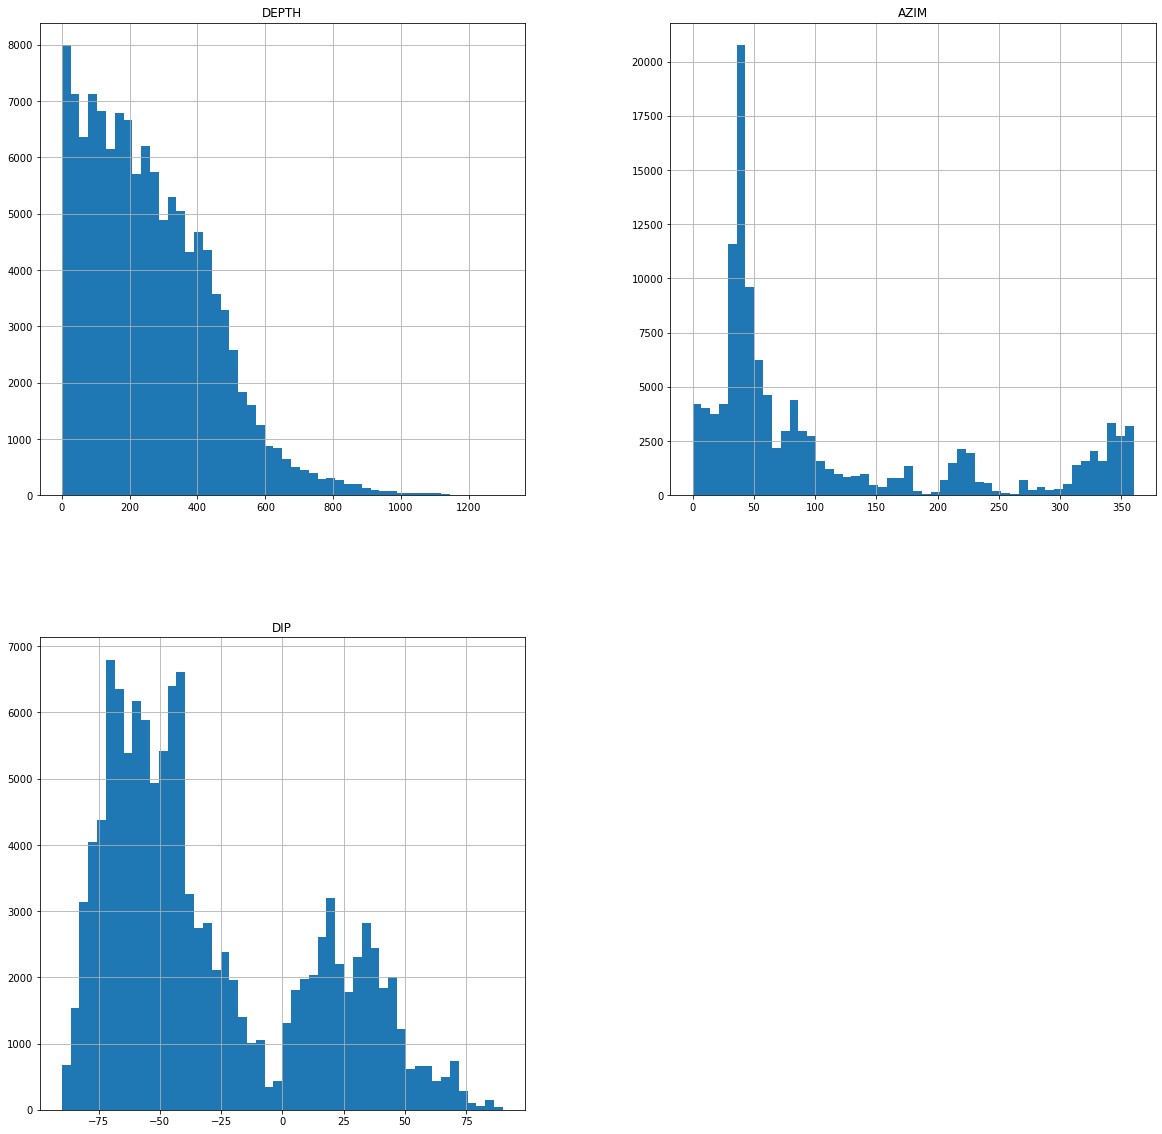

In [33]:
survey.hist(
    bins=50, 
    figsize=(20, 20)
)